# Financial Health Prediction Model Based on Personal Finance Records and Demographics

### Overview

#### Data Understanding

**About Dataset:**  
Dataset contains detailed financial and demographic data for 20,000 individuals in India, focusing on income, expenses, and potential savings across various categories. 

<table>
  <tr>
    <td><b>Parameter</td>
    <td><b>Description</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Monthly income in currency unit</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age of the individual</td>
  </tr>
  <tr>
    <td>Dependents</td>
    <td>Number of dependents supported by the individual</td>
  </tr>
  <tr>
    <td>Occupation</td>
    <td>Type of employment or job role.</td>
  </tr>
  <tr>
    <td>City_Tier</td>
    <td>
    <ul>
    <li>Tier 1: Largest, most developed, and most densely populated cities.</li>
    <li>Tier 2: Mid-sized cities</li>
    <li>Tier 3: Small cities or towns with lower population densities and slower economic growth </li>
    </ul>
    </td>
  </tr>
  <tr>
    <td>Rent<br>Loan_Repayment<br>Insurance<br>Groceries<br>Transport<br>Eating_Out<br>Entertainment<br>Utilities<br>Healthcare<br>Education<br>Miscellaneous</td>
    <td>Monthly Expenses Records
    <br>
    <br>Miscellaneous: Generally refers to expenses that don’t fit neatly into other specific categories, including:
    <ul>
    <li><ins>Unexpected or Infrequent Purchases</ins>: Like a one-time purchase or small repairs.</li>
    <li><ins>Personal Items or Discretionary Spending </ins>: Small items such as magazines, gifts, or occasional treats.</li>
    <li><ins>Random Fees or Minor Charges</ins>: Small service fees or occasional bank charges.</li>
    </ul>
    </td>
  </tr>
  <tr>
    <td>Desired_Saving_Percentage<br>Desired_Savings</td>
    <td>Targets for monthly saving</td>
  </tr>
  <tr>
    <td>Disposable_Income</td>
    <td>Income remaining after all expenses are accounted for</td>
  </tr>
  <tr>
    <td>Potential_Savings_Groceries<br>Potential_Savings_Transport<br>Potential_Savings_Eating_Out<br>Potential_Savings_Entertainment<br>Potential_Savings_Utilities<br>Potential_Savings_Healthcare<br>Potential_Savings_Education<br>Potential_Savings_Miscellaneous</td>
    <td>Includes estimates of potential savings across different spending areas
    <br>(These columns are not relevant to the project)
    </td>
  </tr>
</table>

#### Project Objectives

**Background**:  
Financial health is a term used to describe the state of one's personal monetary affairs.

**Approach**:
- Calculating "Finacial Point" through Financial Scoring System
    - Budget Adherence: Monthly expenses stays within income amount (1 point)
    - Essential vs. Discreationary Spending: Ideally, no more than 30% of income should go toward discretionary expenses (`Entertainent`, `Eating_Out` and 35% of `Miscellaneous`). (1 point)  
    - Saving Rate: (We assume that 65% of `Disposable_Income` value would be the Actual Saving amount)
        - if the Actual Saving amount satisfied the `Desired_Saving` (0.5 point)
        - if the Actual Saving amount is about 15%-20% of income (1 point)
    - Debt Management: DTI Ratio (Debt-to-Income Ratio) below 36% of income (1 point)

- Add a lable to determine personal financial health based on "Financial Point"
    - (4 - 4,5]: Good Financial Health (2)
    - (3 - 3.5]: Average Financial Health (1)
    - <3: Vulnerable Financial Health (0)

- Building model 

- Evaluating model
    

### Libraries 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 0. Loading Data
- Reading data from csv file into DataFrame
- Dropping irrelevant columns 

In [7]:
# Read data from csv file into DataFrame
df = pd.read_csv('data.csv')

df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [9]:
# Drop irrelevant columns
df.drop(['Desired_Savings_Percentage', 
         'Potential_Savings_Groceries',
         'Potential_Savings_Transport',
         'Potential_Savings_Eating_Out',
         'Potential_Savings_Entertainment',
         'Potential_Savings_Utilities',
         'Potential_Savings_Healthcare',
         'Potential_Savings_Education',
         'Potential_Savings_Miscellaneous'], axis=1, inplace=True)

In [10]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings,Disposable_Income
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,6200.537192,11265.627707
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,1923.176434,9676.818733
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,7050.360422,13891.450624
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16694.965136,31617.953615
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,1874.099434,6265.700532


## 1. Data Wragling
- Handling with Missing Values  
    &rarr; This data do not contain missing values
- Formatting Data
- Normalizing Data
- Binning Data: Binning `Age` into `Age_Group`

In [11]:
# Checking for null value

df.isnull().sum()

Income               0
Age                  0
Dependents           0
Occupation           0
City_Tier            0
Rent                 0
Loan_Repayment       0
Insurance            0
Groceries            0
Transport            0
Eating_Out           0
Entertainment        0
Utilities            0
Healthcare           0
Education            0
Miscellaneous        0
Desired_Savings      0
Disposable_Income    0
dtype: int64

&rarr; There is no missing value in this dataset

In [12]:
# Checking for datatypes

df.dtypes

Income               float64
Age                    int64
Dependents             int64
Occupation            object
City_Tier             object
Rent                 float64
Loan_Repayment       float64
Insurance            float64
Groceries            float64
Transport            float64
Eating_Out           float64
Entertainment        float64
Utilities            float64
Healthcare           float64
Education            float64
Miscellaneous        float64
Desired_Savings      float64
Disposable_Income    float64
dtype: object

&rarr; Columns are in the right data type. 

**Binning Age into AgeGroup**

Text(0.5, 1.0, 'Age Distribution')

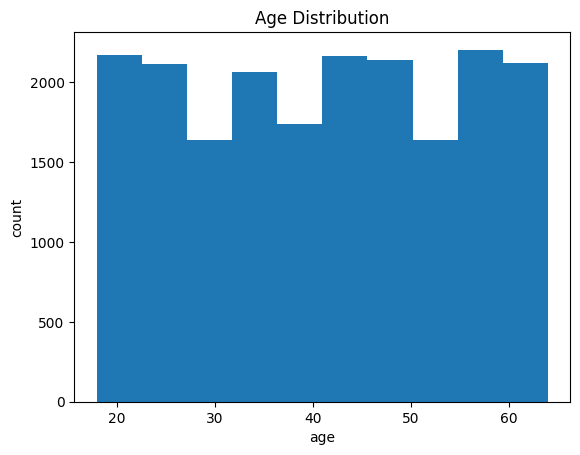

In [13]:
%matplotlib inline

plt.hist(df["Age"])

# set x/y labels and plot title
plt.xlabel("age")
plt.ylabel("count")
plt.title("Age Distribution")

We specify the range of age group as:
- younger: 18 to 35 y/o
- middle-aged: 36 to 55 y/o
- senior: 55 and older

In [14]:
age_group = np.array([18, 35, 55, max(df['Age'])])
age_group_labels=['younger', 'middle-aged', 'senior']

df['Age_Group'] = pd.cut(df['Age'], age_group, labels=age_group_labels, include_lowest=True )
df[['Age','Age_Group']].head()

,Age,Age_Group
0,49,middle-aged
1,34,younger
2,35,younger
3,21,younger
4,52,middle-aged


In [15]:
df['Age_Group'].value_counts(sort=False)

Age_Group
younger        7602
middle-aged    8519
senior         3879
Name: count, dtype: int64

Text(0.5, 1.0, 'Age Group Distribution')

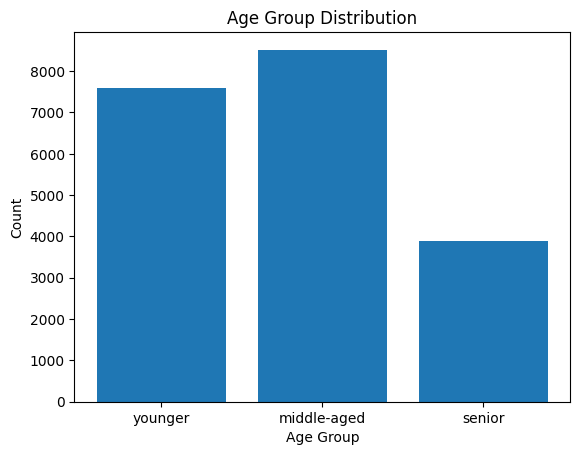

In [16]:
%matplotlib inline

plt.bar(age_group_labels, df["Age_Group"].value_counts(sort=False))

# set x/y labels and plot title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")

In [17]:
def city_tier(df):
    if df['City_Tier'] == 'Tier_1':
        return 1
    if df['City_Tier'] == 'Tier_2':
        return 2
    if df['City_Tier'] == 'Tier_3':
        return 3
    
city_tier = df.apply(city_tier, axis=1)
df['City_Tier'] = city_tier

## 2. Data Preprocessing (for EDA)
- Feature Engineering: 
    - Create `Neccessary_Expense` feature (including <ins>Rent</ins>, <ins>Insurance</ins>, <ins>Groceries</ins>, <ins>Transport</ins>, <ins>Utilities</ins>, <ins>Healthcare</ins>, <ins>Education</ins>)
    - Create `Discretionary_Expenses` feature (including <ins>Entertainment</ins>, <ins>Eating_Out</ins>)
    - Create feature `Fin_Point` and `Fin_Health` based on criteria mentioned in **Project Objectives** section.

- Delete columns that no longer relevant to the project.

In [18]:
def expense_category_neccessary(df):
    neccessary = ['Rent', 'Insurance', 'Groceries', 'Transport', 'Utilities', 'Healthcare', 'Education']
    return sum(df[neccessary]) 

In [19]:
def expense_category_discreationary(df):
    discretionary = ['Entertainment', 'Eating_Out']
    return sum(df[discretionary])

In [20]:
def financial_point(df):
    point = 0
    # Budget Adherence
    if df['Disposable_Income'] > 0: 
        point +=1
    # Expense Management
    ## Note: We assume that 35% of Miscellaneous expense would go toward Discretionary expense
    if df['Discretionary_Expense'] < df['Income']*0.3:
        point +=1
    # Saving Rate
    ## Note: We assume that 65% of Disposable Income would be the Actual Saving amount
    if 0.65*df['Disposable_Income'] >= df['Desired_Savings']:
        point+=0.5
    if 0.65*df['Disposable_Income'] >= 0.20*df['Income']:
        point += 1
    # Debt Management 
    if (df['Loan_Repayment']/df['Income']) < 0.36:
        point += 1
    return point

In [21]:
def fin_health_category(df):

    if df['Fin_Point'] >= 4:
        fin_health = 2
    elif df['Fin_Point'] >= 3:
        fin_health = 1
    elif df['Fin_Point'] < 3:
        fin_health = 0
    
    return fin_health

In [22]:
need = df.apply(expense_category_neccessary, axis=1)
df['Neccessary_Expense'] = need

In [23]:
disc = df.apply(expense_category_discreationary, axis=1)
df['Discretionary_Expense'] = disc

In [24]:
fin_point = df.apply(financial_point, axis=1)
df['Fin_Point'] = fin_point
df['Fin_Point'].value_counts()

Fin_Point
3.5    9761
4.5    6541
3.0    3470
4.0     116
2.0     112
Name: count, dtype: int64

In [25]:
fin_health = df.apply(fin_health_category, axis=1)
df['Fin_Health'] = fin_health
df['Fin_Health'].value_counts()


Fin_Health
1    13231
2     6657
0      112
Name: count, dtype: int64

In [26]:
# After creating "Neccessary Expense" and "Discretionary Expense", we only interested in explore spending habit through these 2 columns
# so we drop those column below for the process to be simplier.

df.drop(['Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 
         'Utilities', 'Healthcare', 'Education', 'Miscellaneous'], axis=1, inplace=True)

In [27]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Desired_Savings,Disposable_Income,Age_Group,Neccessary_Expense,Discretionary_Expense,Fin_Point,Fin_Health
0,44637.249636,49,0,Self_Employed,1,13391.174891,0.000000,6200.537192,11265.627707,middle-aged,29352.110827,3187.985982,3.5,1
1,26858.596592,34,2,Retired,2,5371.719318,0.000000,1923.176434,9676.818733,younger,14917.923012,1699.619840,4.5,2
2,50367.605084,35,1,Student,3,7555.140763,4612.103386,7050.360422,13891.450624,younger,27998.558551,3237.121302,3.5,1
3,101455.600247,21,0,Self_Employed,3,15218.340037,6809.441427,16694.965136,31617.953615,younger,52603.706095,7898.443398,4.5,2
4,24875.283548,52,4,Professional,2,4975.056710,3112.609398,1874.099434,6265.700532,middle-aged,13628.449240,1353.014077,3.5,1


## 3. Exploratory Data Analysis
- Descriptive Statistic
- GroupBy
- Visualizating Data
- Determine Correlations
    1. Age and Income do not have indentifiable correlation. 
    2. Income and Occupation: Income distribution between 4 type of Occupation are almost identical
    2. Is spending habit varied through age?

In [28]:
# Descriptive Statistic Table

df.describe().round(2)

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Desired_Savings,Disposable_Income,Neccessary_Expense,Discretionary_Expense,Fin_Point,Fin_Health
count,20000.00,20000.00,20000.00,20000.0,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,41585.50,41.03,2.00,1.9,9115.49,2049.80,4982.88,10647.37,25147.06,2910.71,3.73,1.33
std,40014.54,13.58,1.42,0.7,9254.23,4281.79,7733.47,11740.64,24499.94,2887.24,0.57,0.48
min,1301.19,18.00,0.00,1.0,235.37,0.00,0.00,-5400.79,788.99,93.13,2.00,0.00
25%,17604.88,29.00,1.00,1.0,3649.42,0.00,1224.93,3774.89,10478.42,1193.98,3.50,1.00
50%,30185.38,41.00,2.00,2.0,6402.75,0.00,2155.36,7224.89,18120.47,2085.89,3.50,1.00
75%,51765.45,53.00,3.00,2.0,11263.94,2627.14,6216.31,13331.95,31138.25,3590.97,4.50,2.00
max,1079728.37,64.00,4.00,3.0,215945.67,123080.68,245504.49,377060.22,625181.82,62510.11,4.50,2.00


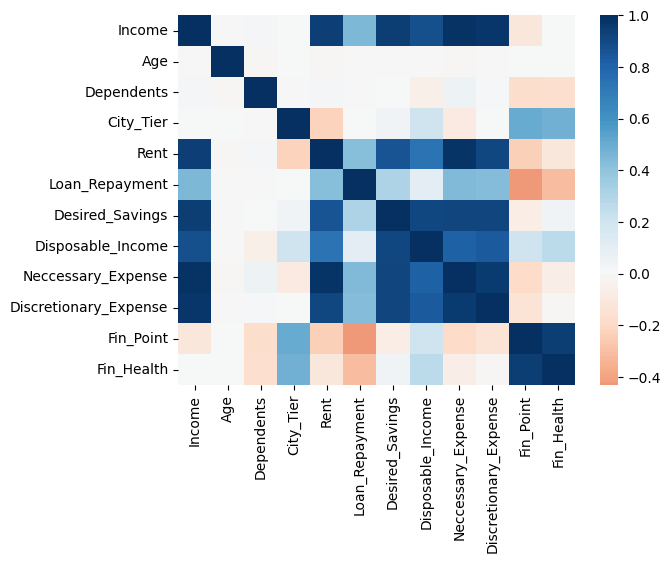

In [29]:
heatplot = sns.heatmap(df.corr(numeric_only=True), cmap='RdBu', center=0)

Looking into this correlation heatmap, there are some interesting insights that we can explore deeper:
- `Age` have no correlation with any other variables.
- `City_Tier` have slightly negative correlation with `Rent`, meaning that the larger the city, the higher the rent fee would be
- `Loan_Repayment` have a significantly negative correlation with Financial Health, it is reasonable since we take into acount DTI Ratio when calculating Financial Point.
    &rarr; Does `Loan_Repayment` amount have any correlation with `Age`/`Age_Group`, `Occupation` or `Dependents`?
- `Rent` have negative impact on `Fin_Health`
- `Dependents` column have negative correlation with `Fin_Health`

##### 1. Age, Income and Occupation: Have no identifiable correlation
In this correlation heatmap, we can see that `Age` and `Income` have no correlation. But it is more reasonable to think that `Age` and `Income` should have a positive linear relationship, isn't it? 

In [30]:
print(df['Income'].min())
print(df['Income'].max())

1301.1873325549093
1079728.3735172302


We can see that between the lowest and highest `Income` value in the dataset have a significantly wide gap

Text(0.5, 1.0, 'Age and Income in Dataset')

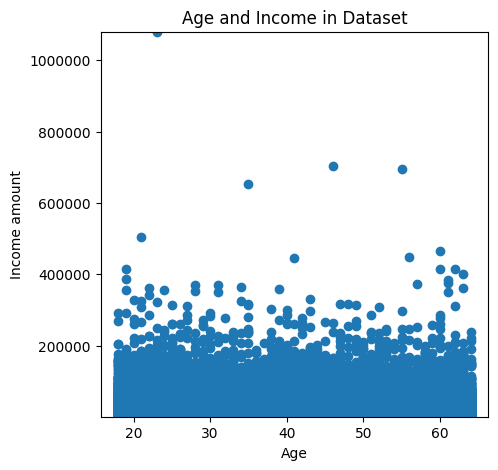

In [31]:
# Ploting Scatter Plot of Age and Income
x = df['Age']
y = df['Income']
plt.subplots(figsize=(5,5))
plt.scatter(x,y)
plt.ylim(df['Income'].min(), df['Income'].max())
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("Age")
plt.ylabel("Income amount")
plt.title('Age and Income in Dataset')

&rarr; **Conclusion:** The income amounts of all age are almost identical and indistinguishable

In [32]:
df['Occupation'].value_counts()

Occupation
Retired          5019
Professional     5011
Student          5003
Self_Employed    4967
Name: count, dtype: int64

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_12808\774032813.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Retired Income', 'Student Income',


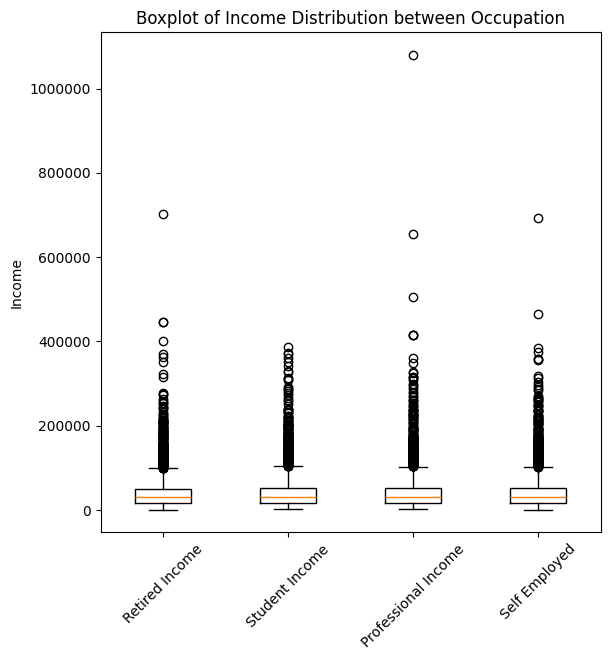

In [33]:
# Ploting Occupation Income Boxplot

retired_box = df['Income'].loc[df['Occupation']=='Retired']
student_box = df['Income'].loc[df['Occupation']=='Student']
professional_box = df['Income'].loc[df['Occupation']=='Professional']
self_employed_box = df['Income'].loc[df['Occupation']=='Self_Employed']
data = [retired_box, student_box, professional_box, self_employed_box]

fig = plt.figure(figsize =(5, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Retired Income', 'Student Income', 
                    'Professional Income', 'Self Employed'])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.title('Boxplot of Income Distribution between Occupation')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

&rarr; **Conclusion**: `Income` distributions are almost identical between 4 types of `Occupation`

##### 3. City Tier and Occupation Distribution

In [34]:
city_occ_grp_df = df[['City_Tier', 'Occupation']]

city_occ_grp_df = city_occ_grp_df.groupby(['City_Tier', 'Occupation'], as_index=False).size()
city_occ_grp_df.rename(columns={'size':'Count'}, inplace=True)

city_occ_grp_df

,City_Tier,Occupation,Count
0,1,Professional,1489
1,1,Retired,1505
2,1,Self_Employed,1473
3,1,Student,1467
4,2,Professional,2499
5,2,Retired,2513
6,2,Self_Employed,2515
7,2,Student,2541
8,3,Professional,1023
9,3,Retired,1001


In [35]:
city_occ_grouped_pivot = city_occ_grp_df.pivot(index='City_Tier',columns='Occupation')

city_occ_grouped_pivot

Count                              
Occupation Professional Retired Self_Employed Student
City_Tier                                            
1                  1489    1505          1473    1467
2                  2499    2513          2515    2541
3                  1023    1001           979     995

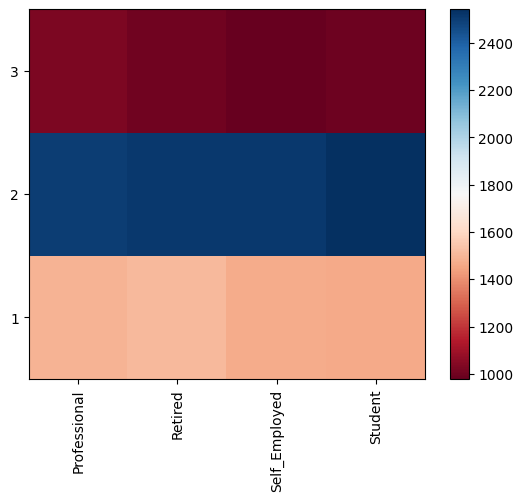

In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(city_occ_grouped_pivot, cmap='RdBu')

#label names
row_labels = city_occ_grouped_pivot.columns.levels[1]
col_labels = city_occ_grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(city_occ_grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(city_occ_grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

##### City Tier and Rent

We know that `Rent` affect badly to `Fin_Health`, but does `Rent` varied through `City_Tier`?

In [37]:
city_rent_grp_df = df[['City_Tier', 'Rent', 'Loan_Repayment']]
city_rent_grp_df = city_rent_grp_df.groupby(['City_Tier'], as_index=False).mean()

city_rent_grp_df

,City_Tier,Rent,Loan_Repayment
0,1,12320.517019,2038.067764
1,2,8342.642141,2062.590409
2,3,6304.708231,2035.005373


##### 3. Spending Habit between Age_Group

In [38]:
younger_df = df.loc[df['Age_Group']=='younger']
middle_age_df = df.loc[df['Age_Group']=='middle-aged']
senior_df = df.loc[df['Age_Group']=='senior']

print(younger_df['Discretionary_Expense'].median())
print(middle_age_df['Discretionary_Expense'].median())
print(senior_df['Discretionary_Expense'].median())

print(younger_df['Neccessary_Expense'].median())
print(middle_age_df['Neccessary_Expense'].median())
print(senior_df['Neccessary_Expense'].median())

2077.983321307548
2094.2687945410844
2080.8118629711553
17931.52155119037
18231.46017317046
18259.575734804348


## 4. Data Process for Model Building

- One-Hot Encoding for `Occupation` feature

In [39]:
df_encoded = pd.get_dummies(df, columns=['Occupation', 'City_Tier'], prefix=['Occupation', 'City_Tier'], dtype=int)

In [40]:
df_encoded.drop(['Age_Group', 'Desired_Savings', 'Disposable_Income',
                 'Neccessary_Expense', 'Discretionary_Expense', 'Rent'],axis=1, inplace=True)

In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    20000 non-null  float64
 1   Age                       20000 non-null  int64  
 2   Dependents                20000 non-null  int64  
 3   Loan_Repayment            20000 non-null  float64
 4   Fin_Point                 20000 non-null  float64
 5   Fin_Health                20000 non-null  int64  
 6   Occupation_Professional   20000 non-null  int32  
 7   Occupation_Retired        20000 non-null  int32  
 8   Occupation_Self_Employed  20000 non-null  int32  
 9   Occupation_Student        20000 non-null  int32  
 10  City_Tier_1               20000 non-null  int32  
 11  City_Tier_2               20000 non-null  int32  
 12  City_Tier_3               20000 non-null  int32  
dtypes: float64(3), int32(7), int64(3)
memory usage: 1.4 MB


In [42]:
df_encoded.head()

,Income,Age,Dependents,Loan_Repayment,Fin_Point,Fin_Health,Occupation_Professional,Occupation_Retired,Occupation_Self_Employed,Occupation_Student,City_Tier_1,City_Tier_2,City_Tier_3
0,44637.249636,49,0,0.000000,3.5,1,0,0,1,0,1,0,0
1,26858.596592,34,2,0.000000,4.5,2,0,1,0,0,0,1,0
2,50367.605084,35,1,4612.103386,3.5,1,0,0,0,1,0,0,1
3,101455.600247,21,0,6809.441427,4.5,2,0,0,1,0,0,0,1
4,24875.283548,52,4,3112.609398,3.5,1,1,0,0,0,0,1,0


## 5. Model Development and Evaluation
- Multinomial Logistic Regression
- Random Forest
- Gradient Boosting Models XGBoost
- KNN - K-Nearest Neighbors

In [43]:
# Feature Selection

X = df_encoded.drop(['Fin_Health', 'Fin_Point'], axis=1)
y = df_encoded['Fin_Health']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Multinomial Logistic Regression

In [46]:
# Create the multinomial logistic regression model
model = LogisticRegression(solver='lbfgs')

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [48]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   1   44    0]
 [   1 3472  486]
 [   0  444 1552]]


In [50]:
# Classification report
class_report = classification_report(y_test, y_pred)
# print("Classification Report:"
print(class_report)

              precision    recall  f1-score   support

           0       0.50      0.02      0.04        45
           1       0.88      0.88      0.88      3959
           2       0.76      0.78      0.77      1996

    accuracy                           0.84      6000
   macro avg       0.71      0.56      0.56      6000
weighted avg       0.84      0.84      0.83      6000



In [52]:
# Define the parameter grid
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

# Initialize the model with multi_class='multinomial'
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 100, 'max_iter': 100, 'solver': 'saga'}


C:\Users\aDMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [53]:
model2 = LogisticRegression(solver='saga', C =10, max_iter=100)

# Fit the model to the training data
model2.fit(X_train, y_train)

C:\Users\aDMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, solver='saga')

In [54]:
# Make predictions on the test data
y_pred_lr2 = model2.predict(X_test)

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred_lr2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0   45    0]
 [   1 3473  485]
 [   0  442 1554]]


In [56]:
# Classification report
class_report = classification_report(y_test, y_pred_lr2)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.88      0.88      0.88      3959
           2       0.76      0.78      0.77      1996

    accuracy                           0.84      6000
   macro avg       0.55      0.55      0.55      6000
weighted avg       0.83      0.84      0.84      6000



### Random Forest

In [57]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

In [58]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = rf_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.8438333333333333


In [61]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   1   44    0]
 [   0 3583  376]
 [   0  517 1479]]


In [67]:
class_report = classification_report(y_test, y_pred_rf)
# print("Classification Report:")
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        45
           1       0.86      0.91      0.88      3959
           2       0.80      0.74      0.77      1996

    accuracy                           0.84      6000
   macro avg       0.89      0.56      0.57      6000
weighted avg       0.84      0.84      0.84      6000



In [69]:
# Feature importance
feature_importances = rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Income: 0.2116
Age: 0.1222
Dependents: 0.0883
Loan_Repayment: 0.3003
Occupation_Professional: 0.0031
Occupation_Retired: 0.0031
Occupation_Self_Employed: 0.0030
Occupation_Student: 0.0030
City_Tier_1: 0.1495
City_Tier_2: 0.0399
City_Tier_3: 0.0760


### K-Nearest Neighbors
KNN is a simple, instance-based learner that predicts based on similarity to other observations. It can work well if there are clear clusters in demographics associated with financial wellness.

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Example with k=5

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

In [65]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8326666666666667


In [66]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04        45
           1       0.86      0.89      0.87      3959
           2       0.77      0.74      0.76      1996

    accuracy                           0.83      6000
   macro avg       0.66      0.55      0.56      6000
weighted avg       0.83      0.83      0.83      6000

